In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/UKESM1-0-LL_2010_2014(ver231212).csv')
supp = pd.read_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/UKESM1-0-LL_2010_2014(supp240109).csv')

dataset = data.merge(supp, how='left', left_on=['longitude', 'latitude', 't', 'loc'], right_on=['longitude', 'latitude', 't', 'loc'])

In [3]:
dataset['c2h6_mole'] = dataset['c2h6']*1.01325*10**5/dataset['tas']*7.243*10**7*10**9
dataset['c3h8_mole'] = dataset['c3h8']*1.01325*10**5/dataset['tas']*7.243*10**7*10**9
dataset['isop_mole'] = dataset['isop']*1.01325*10**5/dataset['tas']*7.243*10**7*10**9

In [4]:
dataset['k17'] = 6.90*10**(-12)*np.exp(-1000/dataset['tas'])
dataset['k18'] = 2.55*10**(-12)*np.exp(380/dataset['tas'])
dataset['k19'] = 6.40*10**(-13)*np.exp(710/dataset['tas'])
dataset['k20'] = 7.60*10**(-12)*np.exp(-585/dataset['tas'])
dataset['k21'] = 2.90*10**(-12)*np.exp(350/dataset['tas'])
dataset['k22'] = 1.51*10**(-13)*np.exp(1300/dataset['tas'])
dataset['k23'] = 2.70*10**(-11)*np.exp(390/dataset['tas'])
dataset['k24a'] = 2.43*10**(-12)*np.exp(360/dataset['tas'])
dataset['k24b'] = 1.12*10**(-13)*np.exp(360/dataset['tas'])
dataset['k24'] = 2.54*10**(-12)*np.exp(360/dataset['tas'])
dataset['k25'] = 2.05*10**(-13)*np.exp(1300/dataset['tas'])
dataset['k26'] = 2.00*10**(-12)
dataset['k27'] = 9.99*10**(-15)*np.exp(-1995/dataset['tas'])

In [5]:
dataset['etoo_mole'] = dataset['k17']*dataset['c2h6_mole']*dataset['oh_mole']/(dataset['k18']*dataset['no_mole']+dataset['k19']*dataset['ho2_mole'])
dataset['proo_mole'] = dataset['k20']*dataset['c3h8_mole']*dataset['oh_mole']/(dataset['k21']*dataset['no_mole']+dataset['k22']*dataset['ho2_mole'])

dataset['a'] = 2*dataset['k26']
dataset['b'] = dataset['k24']*dataset['no_mole'] + dataset['k25']*dataset['ho2_mole']
dataset['c'] = -2*dataset['k23']*dataset['isop_mole']*dataset['oh_mole']

#dataset['iso2_mole'] = dataset['k23']*dataset['isop_mole']*dataset['oh_mole']/(dataset['k24']*dataset['no_mole']+dataset['k25']*dataset['ho2_mole'])
dataset['iso2_mole'] = (-dataset['b']+np.sqrt(dataset['b']*dataset['b']-4*dataset['a']*dataset['c']))/(2*dataset['a'])

### Calculate relevant budget and recover the stacked rates

In [10]:
dataset['prod_etoo_no'] = dataset['k18']*dataset['etoo_mole']*dataset['no_mole']
dataset['prod_proo_no'] = dataset['k21']*dataset['proo_mole']*dataset['no_mole']
dataset['prod_iso2_no'] = dataset['k24a']*dataset['iso2_mole']*dataset['no_mole']

In [11]:
dataset['loss_o3_isop'] = dataset['k27']*dataset['o3_mole']*dataset['isop_mole']

In [12]:
print(dataset['pt1'].mean())
print(dataset['pt2'].mean())
print(dataset['prod_etoo_no'].mean())
print(dataset['prod_proo_no'].mean())
print(dataset['prod_iso2_no'].mean())

603465.3163449488
198234.8765507005
24638.408169189497
14631.95422361546
12926.173166264314
855553.5309582258


In [13]:
print(dataset['pt4'].median())
print(dataset['pt5'].median())
print(dataset['pt6'].median())
print(dataset['loss_o3_isop'].mean())

135370.42147444273
26363.749253946742
66814.85627387176
13250.917446358348
55772.06394097389


In [14]:
dataset['o3prod_mole_stacked'] = dataset['pt1']+dataset['pt2']+dataset['prod_etoo_no']+dataset['prod_proo_no']+dataset['prod_iso2_no']
#dataset['o3prod_mole_stacked'] = dataset['pt1']+dataset['pt2']+dataset['prod_etoo_no']+dataset['prod_proo_no']
dataset['o3loss_mole_stacked'] = dataset['pt4']+dataset['pt5']+dataset['pt6']+dataset['loss_o3_isop']

(-90.0, 90.0)

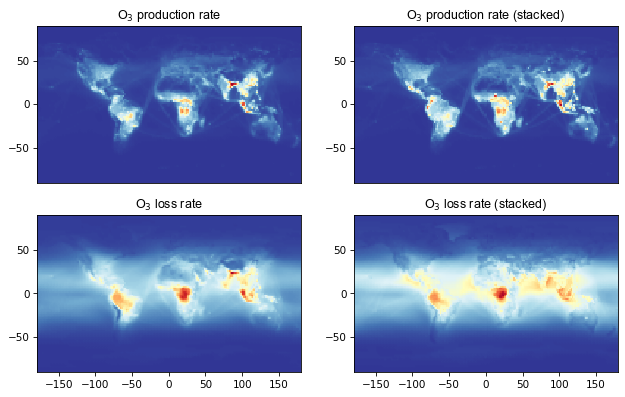

In [15]:
dataset_map = dataset.groupby('loc').mean()
temp = dataset_map

plt.figure(num=None, figsize=(10, 6), dpi=75, facecolor='w', edgecolor='k')
cm = plt.cm.get_cmap('RdYlBu_r')
x = temp['longitude']
y = temp['latitude']

plt.subplot(2,2,1)
plt.title('O${_3}$ production rate', fontsize = 12, fontname = "Arial", color = "black")
z = temp['o3prod_mole']
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.xticks([])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(2,2,2)
plt.title('O${_3}$ production rate (stacked)', fontsize = 12, fontname = "Arial", color = "black")
z = temp['o3prod_mole_stacked']
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.xticks([])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(2,2,3)
plt.title('O${_3}$ loss rate', fontsize = 12, fontname = "Arial", color = "black")
z = temp['o3loss_mole']
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(2,2,4)
plt.title('O${_3}$ loss rate (stacked)', fontsize = 12, fontname = "Arial", color = "black")
z = temp['o3loss_mole_stacked']
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

In [16]:
dataset['pt1'] = dataset['k10']*dataset['ho2_mole']*dataset['no_mole']
dataset['pt2'] = dataset['k14']*dataset['ch3o2_mole']*dataset['no_mole']
dataset['pt3'] = dataset['o3prod_mole_stacked'] - dataset['pt1'] - dataset['pt2']

dataset['pt4'] = dataset['k3']*dataset['o1d_mole']*dataset['h2o_mole']
dataset['pt5'] = dataset['k7']*dataset['oh_mole']*dataset['o3_mole']
dataset['pt6'] = dataset['k11']*dataset['ho2_mole']*dataset['o3_mole']
dataset['pt7'] = dataset['o3loss_mole_stacked'] - dataset['pt4'] - dataset['pt5'] - dataset['pt6']

In [17]:
dataset['pt1_prop'] = dataset['pt1']/dataset['o3prod_mole_stacked']
dataset['pt2_prop'] = dataset['pt2']/dataset['o3prod_mole_stacked']
dataset['pt3_prop'] = dataset['pt3']/dataset['o3prod_mole_stacked']

dataset['pt4_prop'] = dataset['pt4']/dataset['o3loss_mole_stacked']
dataset['pt5_prop'] = dataset['pt5']/dataset['o3loss_mole_stacked']
dataset['pt6_prop'] = dataset['pt6']/dataset['o3loss_mole_stacked']
dataset['pt7_prop'] = dataset['pt7']/dataset['o3loss_mole_stacked']

### Earth surface average

In [39]:
print(np.round(dataset['pt1_prop'].mean(),3))
print(np.round(dataset['pt2_prop'].mean(),3))
print(np.round(dataset['pt3_prop'].mean(),3))

0.483
0.368
0.149


In [38]:
print(np.round(dataset['pt4_prop'].mean(),3))
print(np.round(dataset['pt5_prop'].mean(),3))
print(np.round(dataset['pt6_prop'].mean(),3))
print(np.round(dataset['pt7_prop'].mean(),3))

0.439
0.107
0.405
0.049


In [24]:
dataset.to_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/UKESM1-0-LL_2010_2014(ver240109).csv', index=False)